# Eigenvalue Problems

## Matrix Computing 

Physical systems are often modeled by systems of simultaneous equations written in matrix form.  Realistic models correspond to rather larger matrices, where it is important to use a good linear algebra library.  Computers are unusually good with matrix manipulations because those manipulations typically involve simple instructions that can be iterate many times and algorithms exist to do this quite efficiently.  Subroutines for matrix computing are found in well-established scientific libraries (e.g., `scipy` and `numpy`), where these subroutines are usually 

- ${\sim}10\times$ faster (or more) than the elementary methods found in linear algebra textbooks,
- designed to minimize the round-off error, and 
- have a high chance of success for a broad class of problems.

For these reasons, you *should not write your own matrix methods* (unless absolutely necessary), but instead get them from a library.


## Classes of Matrix Problems

There are some rules of mathematics that help you understand problems when solving equations.  For example, you should encounter problems if:

- you have more unknowns than equations, or
- if your equations are not linearly independent.

While you cannot obtain a unique solution when there are not enough equations, you may be able to *map out* a space of allowable solutions.  

If you have more equations than unknowns, then you have an *overdetermined* problem, which may not have a unique solution.  An overdetermined problem is sometimes treated using data fitting techniques in which a solution to a sufficient set of equations is found, tested on the unused equations, and then improved as necessary.   This technique is calle the *linear least squares method* because the method minimizes the disagreement with the equations.

The most basic matrix problem is a system of linear equations:

```{math}
:label: linear_eqn
\mathbf{A}\mathbf{x} = \mathbf{b},
```

which is defined by a known $N\times N$ matrix $\mathbf{A}$, an unknown vector $\mathbf{x}$ of length $N$, and a known vector $\mathbf{b}$ of length $N$.  The obvious way to solve this equation is to determine the inverse of $\mathbf{A}$ (i.e., $\mathbf{A}^{-1}$) and then multiply both sides to get:

\begin{align}
\mathbf{A}^{-1}\mathbf{A} &=  I_N,\qquad \text{(Identity property)}\\
\mathbf{A}^{-1}\mathbf{A}\mathbf{x} &= \mathbf{A}^{-1}\mathbf{b}, \\
\mathbf{x} &= \mathbf{A}^{-1}\mathbf{b}.
\end{align}

Both the direct solution of Eq. {eq}`linear_eqn` and the process of matrix inversion are standard in a matrix subroutine library.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/uQhTuRlWMxw"
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

```{note}
A more efficient way to solve Eq. {eq}`linear_eqn` is by Gaussian elimination or [lower-upper (LU) decomposition](https://www.quantstart.com/articles/LU-Decomposition-in-Python-and-NumPy/) because it yields the vector $\mathbf{x}$ without explicitly calculating $\mathbf{A}^{-1}$.  Sometimes, you may want the inverse for other purposes, such that the method of multiplying by the inverse is preferred.
```
<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/ZDxONtacA_4"
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>


Other matrix problems are of the following form:

```{math}
:label: eigenvalue_eqn
\mathbf{A}\mathbf{x} = \lambda \mathbf{x},
```

which is similar to Eq. {eq}`linear_eqn`, but with an unknown parameter $\lambda$.  This form is called the *eigenvalue* problem.  It is harder to solve because solutions exist for only certain (if any) values of $\lambda$.  To find a solution, we use the identity matrix to rewrite it as:

\begin{align}
\mathbf{A}x - \lambda\mathbf{x} = 0, \\
[\mathbf{A}-\lambda I_N ]\mathbf{x} = 0.
\end{align}

Multiplying by $[\mathbf{A}-\lambda I_N ]^{-1}$ yields the *trivial* solution $\mathbf{x} = 0$.  A more interesting solution implies the nonexistence of the inverse.  The inverse fails to exist when the determinant is zero, or

\begin{align}
\det{[\mathbf{A}-\lambda I_N]} = 0.
\end{align}

The values of $\lambda$ that satisfy this *secular* equation are the eigenvalues of Eq. {eq}`eigenvalue_eqn`.  To solve this equation, you need a subroutine to calculate the determinant of a matrix, and then a search routine to find the zero (root).

The traditional way to solve Eq. {eq}`eigenvalue_eqn` for both eigenvalues and eigenvectors is by *diagonalization*.  This is a process where a sequence of transformations (using a matrix $\mathbf{U}$) are continually operating on the original equation until one is found so that $\mathbf{U}\mathbf{A}\mathbf{U}^{-1} = \lambda I_N$.  Mathematically, this is:

\begin{align}
\mathbf{U}\mathbf{A}(\mathbf{U}^{-1}\mathbf{U})\mathbf{x} &= \lambda \mathbf{U}\mathbf{x},\\
(\mathbf{U}\mathbf{A}\mathbf{U}^{-1})(\mathbf{U}\mathbf{x}) &= \lambda \mathbf{U}\mathbf{x}, \\
\mathbf{U}\mathbf{A}\mathbf{U}^{-1} &= \begin{pmatrix}
\lambda_1^\prime & & \cdots & 0 \\
0 & \lambda_2^\prime & \cdots & 0 \\
0 & 0 & \lambda_3^\prime& \cdots \\
0 & \cdots & & \lambda_N^\prime 
\end{pmatrix}.
\end{align}

The diagonal values of $\mathbf{U}\mathbf{A}\mathbf{U}^{-1}$ are the eigenvalues with the eigenvectors

\begin{align}
\mathbf{x}_i = \mathbf{U}^{-1}\hat{e}_i.
\end{align}

The eigenvectors are just the columns of the matrix $\mathbf{U}^{-1}$, where there are a number of routines of this type found in subroutine libraries.

<div align="center">

<iframe width="560" height="315"
src="https://www.youtube.com/embed/PFDu9oVAE-g"
frameborder="0" 
allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" 
allowfullscreen></iframe>

</div>

## Practical Matrix Computing

Many scientific programming bugs arise from the improper use of arrays (e.g., `IndexError`).  Matrices are extensively used in scientific computing, where it can be difficult to keep track of maximum index or matrix dimensions.  Here are some things to consider:

- **Computers are finite**: Large matrices require more memory, which can slow down your computation significantly.  For example, a 4D array containing 100 elements in each dimension can have $(100)^4$ $64-\text{byte}$ words that occupy $\simeq 1\ {\rm GB}$ of memory.
- **Processing time**: Matrix operations (e.g., inversion) require ${\sim}N^3$ steps for a square matrix of dimension $N$.  Doubling the dimensions of a 2D square matrix leads to an *eightfold* increase in processing time.
- **Paging**: When a program runs out of RAM (i.e., fast memory), the operating system can use disk space instead and is called *paging*.  The process of writing to the disk is a slow process, which you want to avoid.  If your program is near the memory limit at which paging occurs, even a slight increase in a matrix's dimensions may lead to a *tenfold* increase in execution time.
- **Matrix storage**:  Matrices can be represented as a multidimensional block of stored numbers that appear in a linear order.  A $3\times 3$ matrix can be stored in

  - **row-major order**: $[a_{11},a_{12},a_{13},a_{21},a_{22},a_{23},a_{31},a_{32},a_{33}]$ (in Java or python), or
  - **column-major order**: $[a_{11},a_{21},a_{31},a_{12},a_{22},a_{32},a_{13},a_{23},a_{33}]$ (in Fortran).

    The element $a_{ij}$ is represented by the $i\text{th}$ row and $j\text{th}$ column.  The row-major order traverses *across each row* (i.e., increases the column index $j$) before advancing to the next row (i.e., increases the row index $i$).  The column-major order traverses *down each column* before advancing to the next column.
- **Subscript 0**: In python, C, and Java the indexing of arrays begin with the value 0.  Fortran has recently modified its standard to match these other languages, but older codes will have a standard to start the indices at 1.  
  
  Let `a = np.zeros((3,3))` represent a $3\times 3$ matrix (in python) initialized with $0$ for each element, where $a[0,0] = a_{11}$.  In Fortran, this element would be represented as $a(1,1) = a_{11}$.
- **Physical and logical dimensions**:  Some programming languages require you to issue commands (e.g., `double a[3][3]` or `zeros((3,3), Float))`) that tell the compiler how much memory it needs to set aside fo the array `a`.  This is called *physical memory*, where a matrix's *logical size* is the amount of memory that your actually use to store numbers.

  Modern programming languages permit *dynamic memory allocation*, where you may use variables as the dimension of your arrays and read in the values of the variables at run time (i.e., after the program is compiled).  As a result the matrices will have the same physical and logical sizes.

  However, `Fortran77` requires the dimensions to be specified at *compile time*, which can allow the physical and logical sizes to differ.  As a result, some subroutines from a library may need to know both the physical and logical sizes of your arrays.
- **Passing sizes to subprograms**: This is needed when the logical and physical dimensions of arrays differ.  When using external libraries, you must watch that the sizes of your matrices do not exceed the bound that have been declared in the subprograms.  This may occur *without* an error message and can give you the *wrong answers*.  If you are running a python program that calls a Fortran subroutine, you will need to pass *pointers* (i.e., addresses in memory) to variables and not the actual values of the variables.
- **Equivalence, pointers, references manipulations**: Computers used to have much more limited amounts of memory (see the [Apollo Guidance Computer](https://en.wikipedia.org/wiki/Apollo_Guidance_Computer)), which forced programmers to conserve memory by having different variables occupy the *same* memory location.  This is not a problem as long as these variables were not being used at the same time.  Fortran does this through the `Common` and `Equivalence` statements, where other languages can acheive this through manipulations of pointers and references. However, this is not a good practice as the complexity of the program grows significantly.  Do not use them unless it is a matter of "life or death"!
- **Say what's happening**: You decrease programming errors by using self-explanatory labels for your indices (subscripts), and comments (i.e., stating what your variables mean and describing your storage schemes).
- **Tests**: Always test a library routine on a small problem that your already known the answer to.  Then you'll know if you are supplying it with the right arguments and have all the links working. 

## Linear Algebra in `numpy`
Python does not create what we normally think of as abstract matrices when we use 2D arrays. Fortunately there is the `LinearAlgebra` package that treats 2D arrays (a 1D array of 1D arrays) as abstract matrices, and also provides a simple interface.

Consider the standard matrix equation (Eq. {eq}`linear_eqn`), where $\mathbf{A}$ is a $3\times 3$ matrix, $\mathbf{b}$ is a $3 \times 1$ vector, and the program will figure out the dimensions of vector $\mathbf{x}$.  In python, we start with the `import` packages and verify our input with some `print` statements.

In [1]:
import numpy as np 

A = np.array([[1,2,3],[22,32,42],[55,66,100]]) # Array of arrays
print("A = ", A)
b = np.array([1,2,3])
print("b = ", b)

A =  [[  1   2   3]
 [ 22  32  42]
 [ 55  66 100]]
b =  [1 2 3]


We now solve $\mathbf{A}\mathbf{x} = \mathbf{b}$ using `solve` from `numpy.linalg`, and test how close $\mathbf{A}\mathbf{x}-\mathbf{b}$ comes to a zero vector:

In [2]:
import numpy as np
from numpy.linalg import solve

x = np.linalg.solve(A,b) #Does solution
print("x = ", x)
print("Residual = ", np.dot(A,x)-b ) #LHS - RHS


x =  [-1.4057971  -0.1884058   0.92753623]
Residual =  [ 2.22044605e-16  2.66453526e-15 -1.77635684e-15]


We solved the entire set of linear equations (by elimination) with just the single command `solve`, performed a matrix multiplication (i.e., dot product) with `np.dot`, did a matrix subtraction, and obtained a solution close to machine precision.

A more direct way of solving Eq. {eq}`linear_eqn` is by calculating the inverse $\mathbf{A}^{-1}$, and then finding the dot product of the RHS with the inverse, $\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}$:

In [3]:
import numpy as np 
from numpy.linalg import inv

A_inv = inv(A)
#test inverse through identity property
print("A^{-1}A = ", np.dot(A_inv,A))
#find solution using the inverse
print("x = ", np.dot(A_inv,b))

A^{-1}A =  [[ 1.00000000e+00 -4.30211422e-16 -1.08246745e-15]
 [-1.94289029e-16  1.00000000e+00 -9.99200722e-16]
 [ 9.71445147e-17  4.71844785e-16  1.00000000e+00]]
x =  [-1.4057971  -0.1884058   0.92753623]


We tested that `inv(A)` was true through the identity property, where $\mathbf{A}^{-1}\mathbf{A} = I_3$.  The result was accurate for the diagonal elements and near machine precision for the off-diagonal elements.  Then we used the inverse to solve the matrix equation directly, and found the same answer as before, within machine precision.

Now, consider solving the eigenvalue equation (Eq. {eq}`eigenvalue_eqn`) as the principal-axes system for a cube (i.e., rotational motion).  This requires us to determine a coordinate system in which the **inertia tensor** is diagonal, or

\begin{align}
\mathbf{I}\omega = \lambda \omega,
\end{align}

where $\mathbf{I}$ represents the inertia matrix, $\omega$ is an eigenvector, and $\lambda$ is an eigenvalue.  This can be solved using the `eig` function from `numpy.linalg` given the inertia matrix as

\begin{align*}
\mathbf{I} = \begin{pmatrix}
\frac{2}{3} & -\frac{1}{4} & -\frac{1}{4} \\
-\frac{1}{4} & \frac{2}{3} & -\frac{1}{4} \\
-\frac{1}{4} & -\frac{1}{4} & \frac{2}{3}
\end{pmatrix}.
\end{align*}

In [4]:
import numpy as np
from numpy.linalg import eig 

I = np.array([[2./3.,-0.25,-0.25],[-0.25,2./3.,-0.25],[-0.25,-0.25,2./3.]])
print("I = ", I) #checking that I was input correctly

Es, evectors = eig(I)
print("Eigenvalues = ", Es)
print("Matrix of Eigenvectors = ", evectors) #Transpose is incorrectly printed in the textbook

print("--------------------")
Vec = evectors[:,0] # a single eigenvector to test RHS = LHS
LHS = np.dot(I,Vec)
RHS = np.dot(Vec,Es[0])

print("LHS - RHS = ", LHS-RHS)
print("LHS = ", LHS)
print("RHS = ", RHS)

I =  [[ 0.66666667 -0.25       -0.25      ]
 [-0.25        0.66666667 -0.25      ]
 [-0.25       -0.25        0.66666667]]
Eigenvalues =  [0.91666667 0.16666667 0.91666667]
Matrix of Eigenvectors =  [[ 0.81649658 -0.57735027  0.43514263]
 [-0.40824829 -0.57735027 -0.81589244]
 [-0.40824829 -0.57735027  0.38074981]]
--------------------
LHS - RHS =  [ 1.11022302e-16 -5.55111512e-17 -1.11022302e-16]
LHS =  [ 0.7484552 -0.3742276 -0.3742276]
RHS =  [ 0.7484552 -0.3742276 -0.3742276]


## Testing Matrix Programs
Here are some exercises to see how to solve matrix problems in general.

1. Find the numerical inverse of $\mathbf{A} = \begin{pmatrix} 4 & -2 & 1 \\ 3 & 6 & -4 \\ 2 & 1 & 8 \end{pmatrix}$.

Note that the analytical solution can be determined using the `sympy` module, which is shown below.

'A^{-1} = '

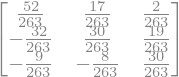

In [5]:
import sympy as sym
from IPython.display import display
sym.init_printing()

A = sym.Matrix([[4, -2, 1], [3, 6, -4],[2, 1, 8]])
display("A^{-1} = ",A.inv())

In [6]:
import numpy as np 
from numpy.linalg import inv 

A = np.array([[4, -2, 1], [3, 6, -4],[2, 1, 8]])
inv_A = inv(A)
print("A = ", A)
print("-------")
print("A^{-1} = ", inv_A)
print("-------")
print("A^{-1}A = ", np.dot(inv_A,A))
print("-------")
analytical_inv_A = (1./263.)*np.array([[52, 17, 2],[-32, 30, 19], [-9,-8, 30]])
error = analytical_inv_A - inv_A
print("error in A^{-1} using analytical result = ", error)

A =  [[ 4 -2  1]
 [ 3  6 -4]
 [ 2  1  8]]
-------
A^{-1} =  [[ 0.19771863  0.06463878  0.00760456]
 [-0.121673    0.11406844  0.07224335]
 [-0.03422053 -0.03041825  0.11406844]]
-------
A^{-1}A =  [[ 1.00000000e+00 -3.46944695e-18  5.55111512e-17]
 [ 2.77555756e-17  1.00000000e+00  2.22044605e-16]
 [ 2.77555756e-17  0.00000000e+00  1.00000000e+00]]
-------
error in A^{-1} using analytical result =  [[ 0.00000000e+00  0.00000000e+00 -6.07153217e-18]
 [ 0.00000000e+00  1.38777878e-17 -2.77555756e-17]
 [ 0.00000000e+00  3.46944695e-18 -1.38777878e-17]]


2. Consider the same matrix $\mathbf{A}$ as before, but now used to describe three simultaneous linear equations, $\mathbf{A}\mathbf{x} = \mathbf{b}$.  Here, $\mathbf{b}$ is known and has three component vectors:
   \begin{align*}
   b_1 = \begin{pmatrix} 12 \\ 4 \\ 20 \end{pmatrix} &\quad b_2 = \begin{pmatrix} -25 \\ -10 \\ -30 \end{pmatrix} & b_3 = \begin{pmatrix} 32 \\ 22 \\ 40 \end{pmatrix}.
   \end{align*}

   Determine the three different $\mathbf{x}$ vectors for each component vector in $\mathbf{b}$.

In [7]:
import numpy as np 
from numpy.linalg import solve 

A = np.array([[4, -2, 1], [3, 6, -4],[2, 1, 8]])
b = np.array([[12, 4, 20], [-25, -10, -30], [32, 22, 40]])
x = solve(A,b)

for i in range(0,3):
    if i ==0:
        print("x_%i = " % (i+1), "[%i, %i, %i]" % (x[0,i],x[1,i],x[2,i]))
    else:
        print("x_%i = " % (i+1), "[%1.3f, %1.3f, %1.3f]" % (x[0,i],x[1,i],x[2,i]))

x_1 =  [1, -2, 4]
x_2 =  [0.312, -0.038, 2.677]
x_3 =  [2.319, -2.966, 4.791]


3. Consider the matrix $\mathbf{A} = \begin{pmatrix} \alpha & \beta \\ -\beta & \alpha \end{pmatrix}$, where you are free to use any values you want for $\alpha$ and $\beta$.  Show that the eigenvalues and eigenvectors are the complex conjugates $x_{1,2}$ and $\lambda_{1,2}$, respectively. Note that python uses $j$ to denote a complex number instead of $i$.
   
\begin{align*} 
x_{1,2} = \frac{1}{\sqrt{2}} \begin{pmatrix} +1 \\ \pm i \end{pmatrix}, &\quad \lambda_{1,2} = \alpha \mp i\beta.
\end{align*}

In [8]:
import numpy as np 
from numpy.linalg import eig 

alpha = np.around(np.random.rand(),4)
beta = 10*np.around(np.random.rand(),4)
A = np.array([[alpha, beta], [-beta, alpha]])
Es, evectors = eig(A)

print("alpha = ",alpha, " beta = ", beta)
for i in range(0,2):
    print("sqrt(2)*x_%i = " % (i+1), np.sqrt(2)*evectors[:,i])
    print("lambda_%i = " % (i+1), np.around(Es[i],4))

alpha =  0.1738  beta =  4.5440000000000005
sqrt(2)*x_1 =  [1.+0.j 0.+1.j]
lambda_1 =  (0.1738+4.544j)
sqrt(2)*x_2 =  [1.+0.j 0.-1.j]
lambda_2 =  (0.1738-4.544j)


## Quantum Eigenvalues in an Arbitrary Potential

Quantum mechanics describes phenomena that occur on very small scales (e.g., atomic and subatomic), where particles exist with some probability $\mathcal{P}$.  The probability is not single-valued, but depends on the a particular region $dx$ for which we seek to locate the particle.  The probability is defined by the particle's *wave function* $\psi(x)$, which is a representation of all the possible locations where a particle *could* exist.  Formally, the probability is given as

\begin{align}
\mathcal{P} = |\psi(x)|^2 dx = \psi^\star(x)\psi(x) dx,
\end{align}

which depends on the inner (conjugate) product of the wave function.  The wave function can be a complex function (i.e., explicitly defined with the imaginary number $i=\sqrt{-1}$), and the conjugate operation $^\star$ simply changes $i$ to $-i$ (i.e., sign flip).

If a particle of definite energy $E$ moving in one dimension (from left to right or right to left) experiences a potential $V(x)$, its wave funciton is determined by an ordinary differential equation ODE (or a partial differential equation PDE when generalized) known as the time-independent [Schr&ouml;dinger equation](https://en.wikipedia.org/wiki/Schr%C3%B6dinger_equation):

\begin{align}
\frac{-\hbar^2}{2m} \frac{d^2\psi(x)}{dx^2} + V(x)\psi(x) &= E\psi(x), \\
\left[\frac{-\hbar^2}{2m} \frac{d^2}{dx^2} + V(x)\right] \psi(x) &= E\psi(x), \\
\hat{H}\psi(x) &= E \psi(x).
\end{align}

The energy $E$ is the ultimate quantity for which we want to know.  But to get there in practice, we solve for the wave vector $\kappa$ instead because the two are related for bound states by:

\begin{align}
\kappa^2 = - \frac{2m}{\hbar^2}E = \frac{2m}{\hbar^2}|E|.
\end{align}

As a result, the Schr&ouml;dinger equation can take the form:

\begin{align}
\frac{d^2\psi(x)}{dx^2} - \frac{2m}{\hbar^2}V(x)\psi(x) &= -\frac{2m}{\hbar^2}E\psi(x), \\
\frac{d^2\psi(x)}{dx^2} - \frac{2m}{\hbar^2}V(x)\psi(x) &= \kappa^2 \psi(x).
\end{align}

A *bound* particle is confined to some finite region of space, which implies that $\psi(x)$ is normalizable (i.e., $\int_a^b \psi^\star(x)\psi(x) dx = 1$).  The only way for that to happen is if $\psi(x)$ *decays* exponentially as $x \rightarrow \pm \infty$ (where the potential vanishes):

\begin{align}
\psi(x) &= \begin{cases}
e^{-\kappa x}, &\text{for } x\rightarrow \infty \\
e^{\kappa x}. &\text{for } x\rightarrow -\infty
\end{cases}
\end{align}

To solve the Schr&ouml;dinger equation, we must require tha the solution $\psi(x)$ simulaneously satisfies the boundary conditions as $x \rightarrow \pm \infty$.  This condition turns the ODE problem into an *eigenvalue* problem that has solutions (*eigenvalues*) for only certain values of the energy $E$, or equivalently $\kappa$.  

- The ground-state energy corresponds to the smallest (i.e., most negative) eigenvalue.
- The ground-state wave function (eigenfunction) must be nodeless and even (i.e., symmetric) about $x = 0$ (or any constant).
- The excited states have higher (less negative) energies and wavefunctions that may be odd (i.e., antisymmetric).

## Nucleon in a box
The nucleon-in-a-box problem is a standard textbook case for which we already know an analytical solution.  This is advantageous for when we want to check whether a code produces the expected result.  The simple model in which the potential $V(x)$ describes a *finite* square well is:

\begin{align}
V(x) &= \begin{cases}
-V_o, &\text{for } |x| \leq a \\
0, &\text{for } |x| > a
\end{cases}
\end{align}

where the well depth $V_o = 83\ {\rm MeV}$ and well radius $a = 2\ {\rm fm}$.  These values are typical for nuclei.  Using this potential, the Schr&ouml;dinger equation becomes

\begin{align}
\frac{d^2\psi(x)}{dx^2} + \frac{2m}{\hbar^2}V_o\psi(x) &= \kappa^2 \psi(x), &\text{for } |x| \leq a \\
\frac{d^2\psi(x)}{dx^2} &= \kappa^2 \psi(x). &\text{for } |x| > a
\end{align}

To evaluate the differential equation, we can combine the constants and identify some familiar values.  Start by inserting $c^2$ into the numerator (and denominator), and using the mass of the proton to get

$$ \frac{2m}{\hbar^2} = \frac{2mc^2}{(\hbar c)^2} \simeq \frac{2\times 940\ {\rm MeV}}{(197.32\ {\rm Mev^{-1}\ fm})^2} = 0.0483\ {\rm MeV^{-1}\ fm^{-2}}. $$

### Eigenvalues via Central Finite Difference

The finite difference method represents the wave function $\psi(x)$ as an array composed of $N$ equally spaced points $(x_1,\ x_2,\ \ldots,\ x_N)$.  Mathematically, this is

\begin{align}
\psi(x) &= \begin{pmatrix} 
    x_1 \\ 
    x_2 \\ 
    \vdots \\ 
    x_N \end{pmatrix}.
\end{align}


Now, we need to find the second derivative given a set of points.  Recall that this is a problem of [numerical differentiation](https://saturnaxis.github.io/CompPhysics/Chapter_5/Differentiation.html) for which we already have some tools available.  In the central difference method, the derivative is approximated by taking a half-step $(h/2)$ forward and backwards $[\psi(x_{i+1/2})$ and $\psi(x_{i-1/2})]$, divided by the step size $h$.  Additionally, the [second derivative](https://saturnaxis.github.io/CompPhysics/Chapter_5/Differentiation.html#second-derivatives) can be approximated as

\begin{align}
\frac{d^2 \psi(x_i)}{dx^2} = \frac{\psi(x_{i+1}) - 2\psi(x_{i}) + \psi(x_{i-1})}{\ell^2},
\end{align}

where $\ell$ is the distance between points $(\ell = x_{i+1} - x_i)$.  Written in matrix form, we get

\begin{align}
\frac{d^2 \psi(x_i)}{dx^2} = \frac{1}{\ell^2} \begin{pmatrix} 
-2 & 1 & 0 & \ldots & \ldots & 0 \\ 
1 & -2 & 1 & \ldots & \ldots & 0 \\ 
0 & 1 & -2 & 1 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & & 0 \\
\vdots & \vdots & \vdots &  & \ddots & 1 \\
0 & 0 & 0 & \dots & 1 & -2 
\end{pmatrix},
\end{align}

where the $\ell^2$ is factored out, the $i{\rm th}$ point is represented along the diagonal, and off-diagonal points correspond to the $i+1$ and $i-1$ points.  The potential $V_(x)$ is represented using the identity matrix $I_N$

\begin{align}
V(x) = -V_o I_N.
\end{align}

The Hamiltonian matrix can then be constructed as $\hat{H} = \frac{d^2 \psi(x_i)}{dx^2} - \frac{2m}{\hbar^2}V(x)$.  Now we have a standard eigenvalue equation $(\hat{H}\psi(x) = E\psi(x))$ that we can solve using a standard libarary. 


[-60.92478383  -7.87018386  18.30728443]


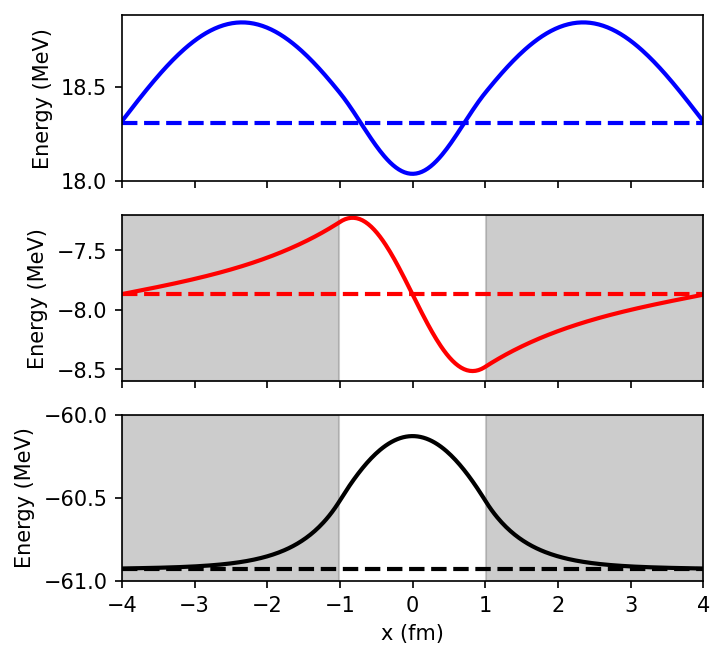

In [9]:
import numpy as np
from numpy.linalg import eigh
import matplotlib.pyplot as plt
from scipy.constants import hbar, m_p, eV


fm = 1e-15
const = hbar**2/(2*m_p)/(eV*1e6*fm**2) #2*m_p/hbar**2 converted to MeV fm**2 units
V_o = -83

well_width = 2.
well_left, well_right = -well_width/2, well_width/2

x_left, x_right = -4., 4.
n_steps = 401
h = (x_right-x_left)/n_steps
x = np.arange(x_left,x_right+h,h)
N = len(x)

left_idx = int(np.abs(x_left-well_left)/h)+1
right_idx = int(np.abs(x_left-well_right)/h)+1
width_idx = right_idx - left_idx

#Construct the Hamiltonian
K = np.diagflat(2*np.ones(N),0) - np.diagflat(np.ones(N-1),1) - np.diagflat(np.ones(N-1),-1)
V = np.zeros((N,N))
V[left_idx:right_idx,left_idx:right_idx] = np.diagflat(V_o*np.ones(width_idx))
H = const*K/h**2 + V

Es, evectors = eigh(H)
z = np.argsort(Es)
evectors = evectors[z]
Es = Es[z]
print(Es[:3])
for i in range(3):
        # normalize the eigenvectors:
        evectors[:, i] = evectors[:, i] / np.sqrt(np.trapz(np.conj(evectors[:,i])*evectors[:,i],x))

fig = plt.figure(figsize=(5,5),dpi=150)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax_list = [ax1, ax2, ax3]

color = ['k', 'r', 'b']
well_sides = np.array([[-61, -8.6, 18],[-60, -7.2, 19]])
for i in range(0,3):
    ax = ax_list[2-i]
    wavefunction = -evectors[:,i] + Es[i]*np.ones(N)
    ax.plot(x,wavefunction,'-',color=color[i],lw=2)
    ax.plot(x,Es[i]*np.ones(N),'--', color=color[i], lw = 2)

    #ax.set_ylim(-83,-60)
    ax.set_xlim(-4,4)
    if i > 0:
        ax.set_xticklabels([])
    if well_sides[0,i] < 0:
        ax.fill_between(x[:left_idx],well_sides[0,i],well_sides[1,i],color='gray',alpha = 0.4)
        ax.fill_between(x[right_idx:],well_sides[0,i],well_sides[1,i],color='gray',alpha = 0.4)
        ax.set_ylim(well_sides[0,i],well_sides[1,i])

    ax.set_ylabel("Energy (MeV)")
ax3.set_xlabel("x (fm)");

### Eigenvalues via ODE Sovler + Search

An alternative solution to the eigenvalue problem combines the numerical solution of the ODE with a trial-and-error search for a wave function that satisfies the boundary condition (exponential decay at $\pm \infty$).  The basic algorithm is as follows:

1. Start on the very far *left* at $x = -X_{\rm max}$, where $X_{max} \gg a$.  Since the potential is zero ($V=0$) in this region, the analytic solution is $e^{\kappa x}$.  Therefore we can define a leftmost wave function:

    \begin{align} \psi_L(-X_{\rm max}) = e^{-\kappa X_{\rm max}}. \end{align}

2. User your favorite ODE solver (e.g., rk4, `scipy.solve_ivp`, etc.) to step $\psi_L(x)$ towards the origin (i.e., rightwards) until you reach the *matching radius* $x_{\rm match}$.  An obvious choice is $x_{\rm match}=-a$ (i.e., the left edge of the potential well), but our final solution is actually independent of the choice for $x_{\rm match}$.
3. Start on the very far *right* at $x = +X_{\rm max}$, with a rightmost wave function:
   
    \begin{align} \psi_R(X_{\rm max}) = e^{-\kappa X_{\rm max}}. \end{align}

4. Use your favorite ODE solver again to step $\psi_R(x)$ leftwards to the origin until you reach the matching radius $x_{\rm match}$.  This means that we have stepped through the potential well.
5. To satisfy the boundary condition, the wave function solution $\psi(x)$ and its derivative $\psi^\prime(x)$ must be continuous at $x=x_{\rm match}$.  Requiring the *logarithmic derivative* $\psi^\prime(x)/\psi(x)$ to be continuous encapsulates both continuity conditions into a single condition and is independent of the normalization of $\psi$.
6. Start the solution with a *guess* for the energy.  A good guess is a value higher up from the bottom of the well, $E>-V_o$.
7. Use the amount of mismatch to improve the next guess for the energy.  We measure how well the wave functions match by calculating the difference:

    \begin{align}
    \Delta (E,x) = \frac{\psi^\prime_L(x)/\psi_L(x) - \psi^\prime_R(x)/\psi_R(x)}{\psi^\prime_L(x)/\psi_L(x) + \psi^\prime_R(x)/\psi_R(x)} \biggr \vert_{x=x{\rm match}},
    \end{align}

    where the denominator is used to avoid overly large or small numbers.  Use how much $\Delta (E)$ has changed from our last guess and use this to deduce an intelligent guess at the next energy.  The search continues until both logarithmic wave functions match within some tolerance $\epsilon$ (i.e., $\Delta (E) \ll \epsilon$).

Final eigenvalue E =  -61.07830255681819


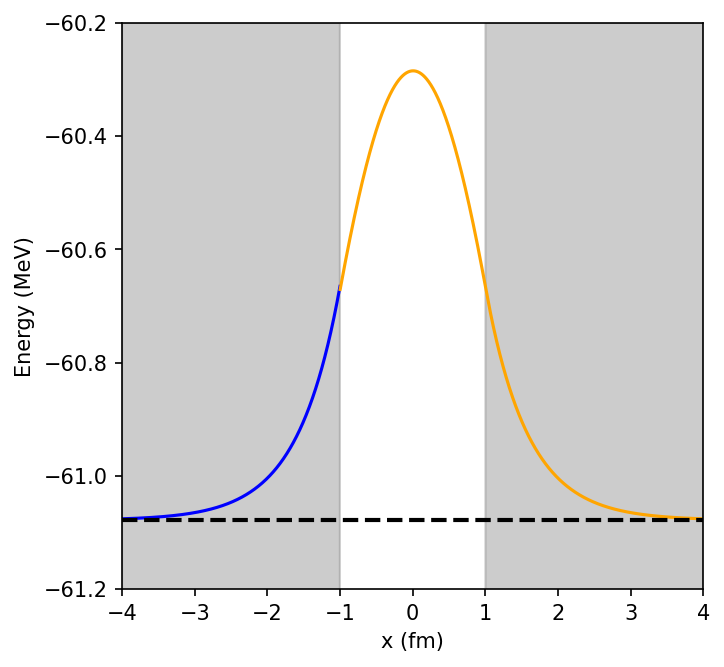

In [12]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.constants import hbar, m_p, eV

fm = 1e-15
const = (2*m_p)/(hbar**2)*(eV*1e6*fm**2) #2*m_p/hbar**2 converted to MeV fm**2 units
V_o = -83.

eps = 0.001
x_left, x_right = -4., 4.
n_steps = 4001
h = np.round((x_right-x_left)/n_steps,3)
x_rng = np.arange(x_left,x_right+h,h)

well_width = 1.
well_left, well_right = -well_width/2, well_width/2
i_match =  int(np.abs(x_left+well_width)/h)
nL = i_match + 1

E = -65 #initial guess
count_max = 100
Emax, Emin = 1.1*E, E/1.1

def func(psi_x,psi_y,psi_E):
    #psi_x = position along wave function
    #y = [psi(x), dpsi(x)/dx]
    return [psi_y[1], -const*(psi_E-V(psi_x))*psi_y[0]]

def V(x):
    #potential at a given x
    if np.abs(x) < well_width:
        return V_o
    else:
        return 0 

def diff(psi_E,return_wf=False):
    kappa = np.sqrt(np.abs(psi_E)*const)
    A = 1
    psi0 = A*np.exp(kappa*x_rng[0])
    y0 = np.array([psi0, kappa*psi0])  # Initial left wf
    x_eval = x_rng[:nL]
    sol = solve_ivp(func,(x_eval[0],x_eval[-1]),y0,args=(psi_E,),method='RK45',t_eval=x_eval,first_step = h/2)
    left = sol.y[1,-1]/sol.y[0,-1]
    y_L = sol.y[0,:]
    
    psi0 = A*np.exp(-kappa*x_rng[-1])
    y0 = np.array([psi0, -kappa*psi0])  # Initial right wf
    x_eval = x_rng[nL:]
    sol = solve_ivp(func,(x_eval[-1],x_eval[0]),y0,args=(psi_E,),method='RK45',t_eval=x_eval[::-1],first_step=h/2)
    right = sol.y[1,-1]/sol.y[0,-1]
    y_R = sol.y[0,:][::-1]

    if return_wf:
        return (left - right)/(left + right), y_L, y_R #logarithmic derivative, left soln, right soln
    else:
        return (left - right)/(left + right)

for count in range(0, count_max + 1):
    E = 0.5*(Emax + Emin)
    Diff_E = diff(E)
    Dmax = diff(Emax)
    if Dmax*Diff_E > 0:
        Emax = E 
    else:
        Emin = E
    if np.abs(Diff_E) < eps:
        Diff_E,y_L,y_R = diff(E,True)
        break #tolerance met stop iterating
    if count == count_max:
        Diff_E,y_L,y_R = diff(E,True)
        print("count max reached")
print("Final eigenvalue E = ", E)

norm = 0
for i in range(0,len(x_rng)-1):
    if i < nL:
        norm += y_L[i]*y_L[i]*h
    else:
        norm += y_R[i-nL]*y_R[i-nL]*h
norm = 1./np.sqrt(norm)

fig = plt.figure(figsize=(5,5),dpi=150)
ax = fig.add_subplot(111)

ax.plot(x_rng[:nL],norm*y_L+E,'b-')
ax.plot(x_rng[nL:],norm*y_R+E,'-',color='orange')
ax.axhline(E,color='k',linestyle='--',lw=2)

ax.fill_between(x_rng[:i_match],-61.5,-60.2,color='gray',alpha = 0.4)
ax.fill_between(x_rng[n_steps-i_match:],-61.5,-60.2,color='gray',alpha = 0.4)
ax.set_xlim(-4,4)
ax.set_ylim(-61.2,-60.2)
ax.set_ylabel("Energy (MeV)")
ax.set_xlabel("x (fm)");

### Numerov Algorithm for a Schr&ouml;dinger ODE

An alternative to the general ODE method is to use the Numerov method, which is an algorithm that is specialized for ODEs without any first derivatives (e.g., our Schr&ouml;dinger equation).  This algorithm is $O(h^6)$, which means that is speeds up the calculation by providing additional precision.  For this algorithm, we star by rewriting the Schr&ouml;dinger equation in the generic form:

\begin{align}
\frac{d^2 \psi}{dx^2} + k^2(x)\psi &= 0, \\
k^2(x) &= \frac{2m}{\hbar^2} \begin{cases}
E+V_o, &\text{for } |x|<a \\
E, &\text{for } |x|>a
\end{cases}
\end{align}

where $k^2 = -\kappa^2$ for bound states.  The trick in the Numerov method is to get extra precision in the second derivative by eliminating the odd power derivatives the Taylor expansion (i.e., no first derivative).  We star with the general Taylor expansion of the wave functions:

\begin{align}
\psi(x+h) &\simeq \psi(x) + h\psi(x)^{\prime} + \frac{h^2}{2}\psi(x)^{\prime\prime} + \frac{h^3}{3!}\psi(x)^{\prime\prime\prime} + \frac{h^4}{4!}\psi(x)^{\prime\prime\prime\prime} + \cdots, \\
\psi(x-h) &\simeq \psi(x) - h\psi(x)^{\prime} + \frac{h^2}{2}\psi(x)^{\prime\prime} - \frac{h^3}{3!}\psi(x)^{\prime\prime\prime} + \frac{h^4}{4!}\psi(x)^{\prime\prime\prime\prime} + \cdots.
\end{align}

Because the expansion of $\psi(x-h)$ has odd powers of $h$ appearing with negative signs, all odd power derivatives cancel when we add:

```{math}
:label: psi_2nd_deriv
\psi(x+h) - \psi(x-h) &\simeq 2\psi(x) + h^2\psi(x)^{\prime\prime} + \frac{h^4}{12}\psi(x)^{\prime\prime\prime\prime} + O(h^6), \\
\psi(x)^{\prime\prime} &\simeq \frac{1}{h^2}\left[\psi(x+h) - \psi(x-h) - 2\psi(x) \right] - \frac{h^2}{12}\psi(x)^{\prime\prime\prime\prime} + O(h^4).
```

We can eliminate the $\psi(x)^{\prime\prime\prime\prime}$ term by applying the operator $1 + \frac{h^2}{12}\frac{d^2}{dx^2}$ to the Schr&ouml;dinger equation:

\begin{align}
\left[1 + \frac{h^2}{12}\frac{d^2}{dx^2}\right] \left[\frac{d^2 \psi}{dx^2} + k^2(x)\psi \right] &= 0, \\
\frac{d^2 \psi}{dx^2} + k^2(x)\psi + \frac{h^2}{12}\frac{d^4 \psi}{dx^4} + \frac{h^2}{12}\frac{d^2}{dx^2}\left[k^2(x)\psi\right] &= 0, \\
\psi(x)^{\prime\prime} +\frac{h^2}{12}\psi(x)^{\prime\prime\prime\prime} + k^2(x)\psi + \frac{h^2}{12}\frac{d^2}{dx^2}\left[k^2(x)\psi\right] &= 0.
\end{align}

Then we can substitute our derived expression from Eq. {eq}{psi_2nd_deriv} to cancel the $\psi(x)^{\prime\prime\prime\prime}$ term to get:

\begin{align}
\frac{1}{h^2}\left[\psi(x+h) - \psi(x-h) - 2\psi(x) \right] + k^2(x)\psi + \frac{h^2}{12}\frac{d^2}{dx^2}\left[k^2(x)\psi\right] &\simeq 0.
\end{align}

The central-difference approximation for the second derivative of $k^2(x)\psi$ is:

\begin{align}
\frac{d^2}{dx^2}\left[k^2(x)\psi\right] &\simeq  \frac{(k^2\psi)_{x+h} + (k^2\psi)_{x-h} -2 (k^2\psi)_x }{h^2}, \\
&\simeq  \frac{k^2(x+h)\psi(x+h) + k^2(x-h)\psi(x-h) -2 k^2(x)\psi(x)}{h^2}.
\end{align}

After this substitution, we obtain the Numerov algorithm:

\begin{align}
\psi(x+h) \simeq \frac{12}{1+h^2k^2(x+h)}\left(\left[1-\frac{5}{12}h^2k^2(x)\right]\psi(x) - \left[1+\frac{1}{12}h^2k^2(x-h)\right]\psi(x-h) \right).
\end{align}

The Numerov algorithm uses the values of $\psi$ at the two steps ($x$ and $x-h$) to move $\psi$ forward to $x+h$.  To step backward in $x$, we need only to reverse the sign of $h$.

Energy E =  -61.019243597984314


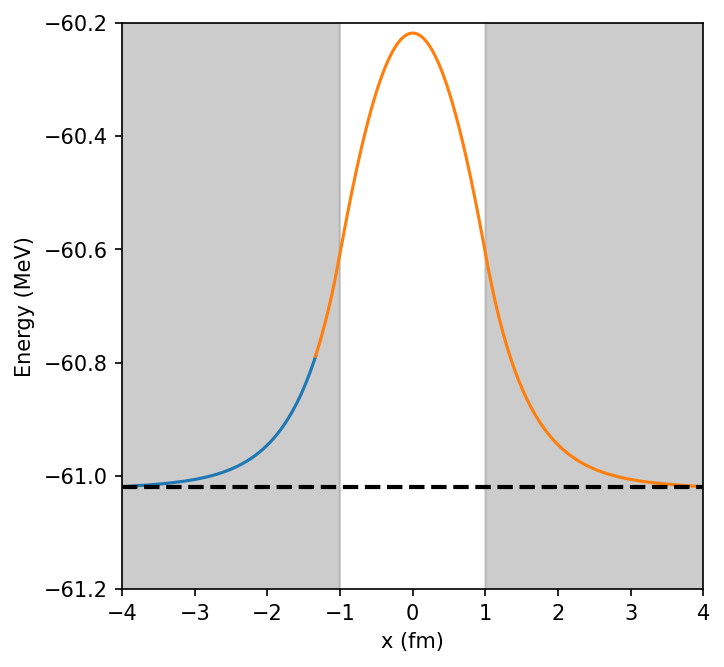

In [13]:
import numpy as np
import matplotlib.pyplot as plt

dl = 1e-6
n = 4001
ul, ur = np.zeros(n), np.zeros(n)
ul[0],ur[0] = -1e-15,-1e-15

left_x, right_x = -4., 4.
well_width = 1.
h = (right_x-left_x)/(n-1)
i_left =  int(np.abs(x_left+well_width)/h)
b = h**2/12.
Emin, Emax = -65, -55 #root limits
E = Emin #initial E guess
dE = 0.001
V_o = -83.
const = 0.04829

xl = np.arange(left_x,right_x,h)
xr = xl[::-1]


def V(x):
    pot = np.zeros(n)
    well_idx = np.where(np.abs(x)<=well_width)[0]
    pot[well_idx] = V_o
    return pot

def numerov(n,k2,u):
    for i in range(1,n-1):
        u[i+1] = (2*u[i]*(1-5*b*k2[i]) - (1+b*k2[i-1])*u[i-1])/(1+b*k2[i+1])

def normalize(u):
    Esum = 0
    for i in range(0,n):
        if i > im:
            ul[i] = ur[n-i-1]
            Esum += ul[i]**2
    Esum = np.sqrt(h*Esum)
    u /= Esum 

k2l = const*(E-V(xl))
k2r = const*(E-V(xr))

im = n // 3 #match point
nl, nr = im + 2, n-im+1
istep = 0
imax = 1000

numerov(nl,k2l,ul)
numerov(nr,k2r,ur)
ul *= ur[nr-2]/ul[im]
f0 = (ur[nr-1] + ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # log derivative

while abs(dE) > dl and istep < imax:
    e1 = E
    E = (Emin + Emax)/2.
    k2l += const*(E-e1)*np.ones(n)
    k2r += const*(E-e1)*np.ones(n)
    numerov(nl,k2l,ul)
    numerov(nr,k2r,ur)
    ul *= ur[nr-2]/ul[im]
    f1 = (ur[nr-1] + ul[nl-1]-ur[nr-3]-ul[nl-3])/(2*h*ur[nr-2]) # log derivative
    if f0*f1 < 0:
        Emax = E
    else:
        Emin = E
        f0 = f1
    dE = Emax - Emin 
    istep += 1

normalize(ul)
normalize(ur)
print("Energy E = ", E)
fig = plt.figure(figsize=(5,5),dpi=150)
ax = fig.add_subplot(111)

ax.plot(xl[:nl-1],ul[:nl-1]+E,'-')
ax.plot(xr[:nr],ur[:nr]+E,'-')
ax.axhline(E,color='k',linestyle='--',lw=2)

ax.fill_between(x_rng[:i_left],-61.5,-60.2,color='gray',alpha = 0.4)
ax.fill_between(x_rng[n_steps-i_left:],-61.5,-60.2,color='gray',alpha = 0.4)
ax.set_xlim(-4,4)
ax.set_ylim(-61.2,-60.2)
ax.set_ylabel("Energy (MeV)")
ax.set_xlabel("x (fm)");